# Lüften kann Klimatisierung vermeiden

`{only} html [![DOI](https://zenodo.org/badge/DOI/10.0000/zenodo.0000000.svg)](https://doi.org/10.0000/zenodo.0000000)`

- [ ] TODO Zitierweise, Danksagung Förderung einfügen - auch im pdf!!

- [ ] TODO Version xy auf zenodo hochladen, DOI erhalten und dann hier Zitat angeben

- [ ] TODO in JOSE publizieren und dann ebenfalls Zitat hier angeben

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import holidays
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import locale

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('holidays', holidays.__version__)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('locale', locale)

Versionen der verwendeten python-Module: 
numpy 1.20.3
matplotlib 3.3.4
pandas 1.3.0
datetime <module 'datetime' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/consye/lib/python3.9/datetime.py'>
holidays 0.11.2
seaborn 0.11.1
plotly 4.14.3
sys 3.9.5 (default, Jun  4 2021, 12:28:51) 
[GCC 7.5.0]
os <module 'os' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/consye/lib/python3.9/os.py'>
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/consye/lib/python3.9/locale.py'>


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['text.usetex'] = True
pd.set_option('display.latex.repr', True)
pd.set_option('display.latex.longtable', True)
locale.setlocale(locale.LC_ALL, '')

'de_DE.UTF-8'

- [ ] TODO am Anfang immer die gleichen Layoutparameter laden -> in allen notebooks aktualisieren

### Funktionen definieren

## Lernziele

:::{admonition} Lernziele für diesen Abschnitt:
:class: tip
- was
- Komfortparameter Temperatur, CO2-Gehalt, Feuchte -> Lüften
- womit
- wozu
:::

## Anforderungen an Raumluft

## CO$_2$-Gehalt

Menschen atmen Kohlendioxid (CO$_2$) aus. Gleichzeitig dünsten Menschen andere, riechbare Stoffe aus. Beides nimmt ohne Lüftung mit der Zeit an Konzentration zu und daher gilt CO$_2$ als Leitparameter zur Beurteilung der Lüftungssituation {cite:p}`thomas_lahrz_gesundheitliche_2008`. 

Die Umgebungsluft besitzt natürlicherweise einen Anteil von $400\text{ ppm}$ (Volumenpromille) CO$_2$ {cite:p}`thomas_lahrz_gesundheitliche_2008`. 

Folgende Faktoren beeinflussen die CO$_2$-Konzentration in Innenräumen wesentlich: {cite:p}`thomas_lahrz_gesundheitliche_2008`:
- Anzahl der Personen
- Raumvolumen
- Aktivität der Innenraumnutzenden
- Aufenthaltsdauer
- Verbrennungsvorgänge
- Luftwechsel bzw. Außenluftvolumenstrom

Relevant sind die jeweiligen Momentanwerte (Messung während < 2 min.) der CO$_2$-Konzentration, nicht (Tages-)Mittelwerte {cite:p}`thomas_lahrz_gesundheitliche_2008`.

Gesundheitlich-hygienische Leitwerte für CO$_2$ beschreiben noch nicht ein giftiges Level (toxikologisch begründet), sondern beinhalten wissenschaftlich begründete Handlungsempfehlungen, oberhalb derer Beschwerden und nachteilige gesundheitliche Auswirkungen zunehmen {cite:p}`thomas_lahrz_gesundheitliche_2008`. 

Messempfehlungen lt. VDI 4300-9 {cite:p}`thomas_lahrz_gesundheitliche_2008`:
- vor Beginn einige Minuten kräftig querlüften
- übliche Personenzahl und Aktivität im Raum
- raumlufttechnische Anlagen im üblichen Betriebspunkt betreiben
- kontinuierlich während der Nutzungsdauer messen
- Ort der Messung: Höhe von 1,5 m, Abstand von 1-2 m von den Wänden oder dem Aufenthaltsort einer Person anpassen
- Mindestabstand 1 m von ausgeatmeter Luft
- Messung mithilfe nicht-dispersiver Infrarotspektroskopie (NDIR) oder photoakustischer Spektroskopie (PAS)
- Messwerte loggen, um ein zeitlich aufgelöstes Konzentrationsprofil zu erhalten

Text(0.5, 1.0, 'Quelle Lahrtz et.al. 2008')

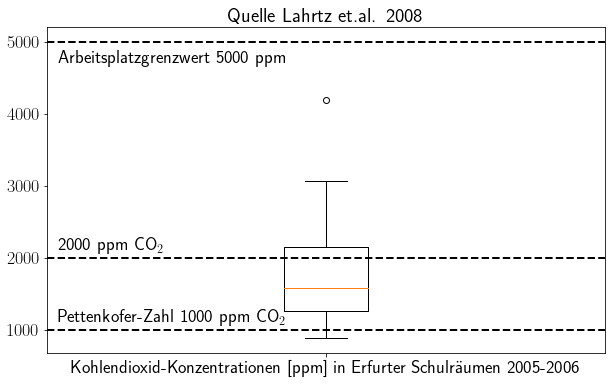

In [31]:
fix, ax = plt.subplots()
boxes = [
    {
        'label' : "Kohlendioxid-Konzentrationen [ppm] in Erfurter Schulräumen 2005-2006",
        'whislo' : 882, 
        'q1' : 1261,
        'med' : 1576,
        'q3' : 2141,
        'whishi' : 3069,
        'fliers' : [4186]
    }
]
ax.bxp(boxes)
ax.plot([0.5,1.5],[1000,1000],'k--')
ax.text(0.52,1100,'Pettenkofer-Zahl 1000 ppm CO$_2$')
ax.plot([0.5,1.5],[2000,2000],'k--')
ax.text(0.52,2100,'2000 ppm CO$_2$')
ax.plot([0.5,1.5],[5000,5000],'k--')
ax.text(0.52,4700,'Arbeitsplatzgrenzwert 5000 ppm')
ax.set_title('Quelle Lahrtz et.al. 2008')

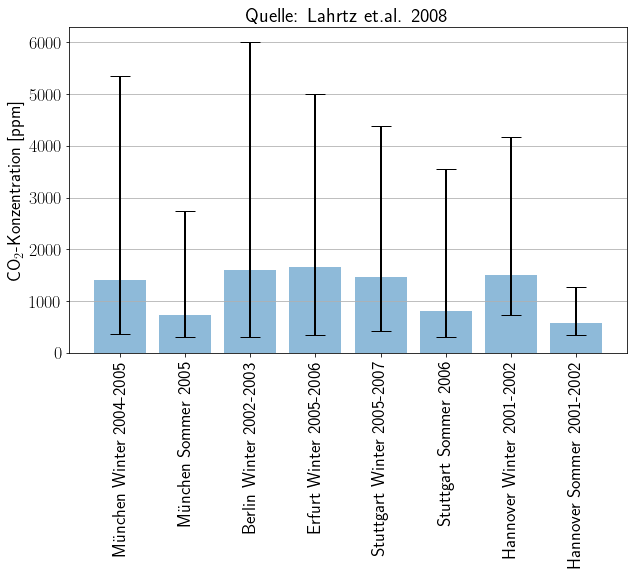

In [27]:
schools = ['München Winter 2004-2005','München Sommer 2005', 'Berlin Winter 2002-2003', 'Erfurt Winter 2005-2006', 'Stuttgart Winter 2005-2007', 'Stuttgart Sommer 2006', 'Hannover Winter 2001-2002', 'Hannover Sommer 2001-2002']
co2median = np.array([1412,728,1600,1654,1459,820,1510,581])
co2min = [367,314,300,355,431,304,730,339]
co2max = [5359,2742,6000,4998,4380,3554,4177,1270]
x_pos = np.arange(len(schools))
fig, ax = plt.subplots()
ax.bar(x_pos, co2median, yerr = [co2median-co2min,co2max-co2median], align = 'center', alpha = 0.5, ecolor = 'black', capsize = 10)
ax.set_ylabel('CO$_2$-Konzentration [ppm]')
ax.set_xticks(x_pos)
ax.set_xticklabels(schools,rotation = 90)
ax.set_title('Quelle: Lahrtz et.al. 2008')
ax.yaxis.grid(True)

Gesundheitliche Wirkungen von Kohlendioxid (und damit gleichzeitig ansteigenden Konzentrationen weiterer Stoffe) in der Atemluft {cite:p}`thomas_lahrz_gesundheitliche_2008`
- bei erhöhter CO$_2$-Konzentration erhöhen sich Atemfrequenz und Atemzugvolumen
- Schwierigkeit bei Studien: häufig Temperaturänderungen nicht separat betrachtet (erhöhte Temperatur verschlechtert z. B. auch Konzentrationsfähigkeit)
- generell steigt bei höherer Lüftungsrate die Konzentrationsfähigkeit und Symptome wie Kopfschmerzen nehmen ab

DIN EN 13779:2007-09 gibt hohe Raumluftqualität bis 800 ppm und Lüftungsrate >54 m³ pro Stunde und Person an {cite:p}`thomas_lahrz_gesundheitliche_2008`.

DIN EN 13779:2007-09 gibt niedrige Raumluftqualität bei > 1000 ppm CO$_2$ und einer Lüftungsrate von weniger als 6 m³ pro Stunde und Person an.

DIN EN 15251 "Eingangsparameter für das Raumklima zur Auslegung und Bewertung der Energieeffizienz von Gebäuden - Raumluftqualität, Temperatur, Licht und Akustik" bringt diese Werte in Zusammenhang mit der Energieeffizienz. Schlechtes Innenraumklima verursacht häufig höhere Kosten als es Energiekosten tun {cite:p}`thomas_lahrz_gesundheitliche_2008`.

- Feuchte

- Temperatur

- Aerosol-Gehalt

- [ ] TODO noch hinterlegen (aus buildings und CO2-Literatur)

## Lüften zum Wohlfühlen

![Empfehlung für die Dauer und Anzahl von Stoßlüftungsvorgängen](https://www.co2online.de/fileadmin/_processed_/4/c/csm_lueften_bddae9044c.jpg)

Beim Stoßlüften findet ein intensiver Luftaustausch zwischen außen und innen statt. Es ist daher günstig, an heißen Sommertagen nachts und früh am Morgen zu lüften, um die Temperatur erträglich zu halten {cite:p}`co2online_8_2021`.

- [ ] TODO Formel und Codebeispiel

Falls eine Lüftungsanlage existiert, ist eine *intensive Nachtlüftung* sinnvoll und Lüftungsanlagen arbeiten effizienter mit Erdwärmetauschern {cite:p}`co2online_8_2021` als mit ... Als Richtwert: ein 30 m langes Erdrohr kühlt Zuluft um 5 bis 10 Kelvin {cite:p}`co2online_8_2021`.

- [ ] TODO Formel und Codebeispiel

## Literatur

```{bibliography}
:filter: docname in docnames
```